# Data Visualizations of Mock Learner Data and Interactions with Mock Learning Products
This notebook is an example of the art of the possible for reimagining how the the Canada School of the Public Service works with our learners and our client departments. All data in this notebook is simulated using the models and generators in [https://github.com/ToferC/learner_models](this Repo). None of the data represents a real person, class or organization, but all data has been modelled after the broad demographics of the Government of Canada and a hypothetical model of how learners might interact with learning products at the CSPS.

In [ ]:
## Data Structure


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline

In [2]:
data_dir = "./data/"

In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]
seven_grad=["darkred", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]
seven_diff=["brown", "green", "dodgerblue", "gold", "royalblue", "orange", "forestgreen"]

In [5]:
df.columns

Index(['eval_id', 'learner_id', 'audience', 'group', 'level', 'role',
       'organization', 'pronouns', 'sexuality', 'ethnicity', 'language',
       'person_with_disability', 'openness', 'exclusion', 'registration_id',
       'offering_id', 'learning_product', 'business_line', 'content',
       'duration', 'module', 'date_stamp', 'objective', 'current_skill',
       'desired_skill', 'final_skill', 'recommend', 'rating', 'clear',
       'entertaining', 'relevant', 'informative', 'useful', 'inclusive',
       'easy', 'difficult', 'long', 'short', 'percent_completed', 'lo_1',
       'lo_2', 'physical_space', 'physical_clean', 'physical_comfortable',
       'physical_professional', 'physical_pleasant', 'physical_accessible',
       'digital_content', 'digital_smooth', 'digital_professional',
       'digital_accessible', 'personnel_present', 'personnel_pleasant',
       'personnel_helpful', 'personnel_professional', 'personnel_inclusive',
       'personnel_knowledgeable'],
      dtype='obj

In [6]:
df.describe()

,eval_id,learner_id,level,openness,exclusion,registration_id,offering_id,duration,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.368196,0.600424,0.243455,99624.641524,960.199067,66.053655,181.865474,2.521514,4.581973,3.019181,7.807089,0.673101
std,7906.514896,7906.514896,1.775194,0.151924,0.201806,73716.390247,94.998638,20.430478,96.418462,1.481287,1.502731,1.585085,1.757045,0.228037
min,70000.000000,0.000000,1.000000,0.034711,0.000000,0.000000,877.000000,45.000000,101.000000,0.000000,2.000000,0.000000,4.000000,0.000000
25%,73428.750000,3428.750000,2.000000,0.497881,0.100000,30428.750000,880.000000,45.000000,101.000000,1.000000,4.000000,2.000000,6.000000,0.500000
50%,77357.500000,7357.500000,3.000000,0.600308,0.200000,70357.500000,884.000000,60.000000,102.000000,2.000000,5.000000,3.000000,8.000000,0.700000
75%,89570.250000,19570.250000,5.000000,0.704294,0.400000,182141.250000,1077.000000,90.000000,301.000000,4.000000,6.000000,4.000000,10.000000,0.900000
max,91999.000000,21999.000000,7.000000,1.000000,1.300000,192999.000000,1078.000000,150.000000,301.000000,8.000000,10.000000,9.000000,10.000000,1.000000


In [7]:
audience = df.audience
role = df.role

In [8]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [9]:
scan.groupby(['pronouns', 'ethnicity', 'person_with_disability']).agg('mean')

level  openness  exclusion  \
pronouns ethnicity      person_with_disability                                  
HeHim    Asian          False                   3.650485  0.594268   0.246278   
                        True                    3.132075  0.629268   0.641509   
         Black          False                   3.335593  0.586438   0.244068   
                        True                    3.000000  0.615126   0.631250   
         Caucasian      False                   3.380388  0.603529   0.044698   
                        True                    3.356618  0.590835   0.443382   
         HispanicLatinx False                   3.315068  0.607623   0.248630   
                        True                    3.035714  0.631261   0.621429   
         Indigenous     False                   3.396226  0.584393   0.228616   
                        True                    2.920000  0.591406   0.620000   
         NoAnswer       False                   3.358974  0.598080   0.245299   
                        True                    2.800000  0.603464   0.620000   
NoAnswer Asian          False                   3.428571  0.543390   0.425000   
                        True                    2.600000  0.707197   1.040000   
         Black          False                   3.250000  0.558652   0.446875   
                        True                    6.333333  0.491786   0.800000   
         Caucasian      False                   3.473384  0.582124   0.244867   
                        True                    2.509804  0.576462   0.641176   
         HispanicLatinx False                   3.176471  0.592414   0.494118   
                        True                    4.000000  0.845026   0.800000   
         Indigenous     False                   3.714286  0.590698   0.451429   
                        True                    2.250000  0.783884   0.850000   
         NoAnswer       False                   2.733333  0.663628   0.503333   
                        True                    4.000000  0.926877   0.900000   
SheHer   Asian          False                   3.093220  0.587295   0.434746   
                        True                    3.521739  0.601649   0.854348   
         Black          False                   3.342679  0.615859   0.445171   
                        True                    3.294118  0.555258   0.838235   
         Caucasian      False                   3.384904  0.598005   0.241389   
                        True                    3.160643  0.610702   0.646185   
         HispanicLatinx False                   3.104430  0.592019   0.456962   
                        True                    3.000000  0.605571   0.852174   
         Indigenous     False                   3.536313  0.623035   0.435754   
                        True                    3.000000  0.592844   0.845714   
         NoAnswer       False                   3.543103  0.610965   0.462069   
                        True                    3.433333  0.624044   0.833333   
TheyThem Asian          False                   3.928571  0.617012   0.410714   
                        True                    2.200000  0.666277   0.820000   
         Black          False                   3.511628  0.562929   0.451163   
                        True                    3.000000  0.568036   0.800000   
         Caucasian      False                   3.444444  0.616151   0.243590   
                        True                    3.653846  0.617428   0.619231   
         HispanicLatinx False                   3.357143  0.588173   0.425000   
                        True                    3.000000  0.448217   0.800000   
         Indigenous     False                   3.617647  0.554348   0.414706   
                        True                    2.333333  0.610036   0.800000   
         NoAnswer       False                   3.257143  0.625346   0.454286   
                        True                    3.000000  0.514159   0.800000   



In [10]:
scan.groupby('module').agg('mean')

,level,person_with_disability,openness,exclusion,duration,current_skill,desired_skill,final_skill,recommend,rating,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.401778,0.100889,0.600252,0.246689,90.0,2.526444,4.587333,2.650444,0.611333,7.162444,...,1.0,0.385778,0.355778,0.607111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.401778,0.100889,0.600252,0.246689,45.0,2.526444,4.587333,3.613333,0.774000,8.000444,...,1.0,0.234667,0.297333,0.416000,1.0,0.394667,0.471333,0.422222,0.320000,0.572444
201,3.273148,0.074074,0.592763,0.215741,90.0,2.620370,4.662037,2.620370,0.319444,6.046296,...,0.0,0.000000,0.000000,0.000000,1.0,0.203704,0.125000,0.212963,0.180556,0.319444
202,3.273148,0.074074,0.592763,0.215741,150.0,2.620370,4.662037,3.550926,0.777778,7.995370,...,0.0,0.000000,0.000000,0.000000,1.0,0.217593,0.166667,0.180556,0.203704,0.263889
301,3.324667,0.098167,0.601233,0.240600,60.0,2.507000,4.568167,2.845333,0.811667,8.202167,...,1.0,0.304667,0.486167,0.328167,1.0,0.526833,0.435333,0.410667,0.465167,0.596833


In [11]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

# Create Dataframes for later use
module = feedback[["module", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]
rating = df[["module", "rating"]]

## Ratings for learning products
Takes user ratings from a 1-10 scale. Able to cut by business line, learning products, virtual vs. in-class products, etc.

### Rating by learning product.
Simple aggregated ratings for specific learning products.

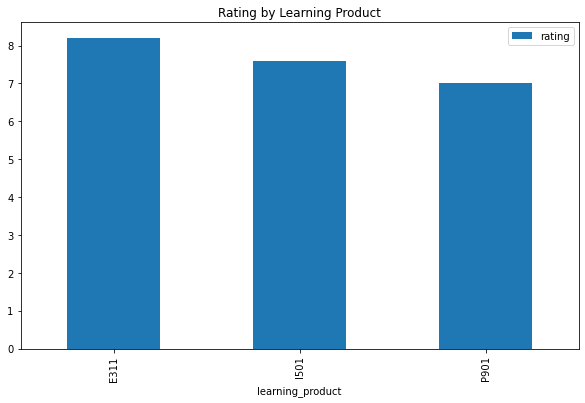

In [12]:
rating_offering = df[["learning_product", "rating"]]
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product", figsize=(10,6))

### Rating by learning product module.
A deeper dive into learning products broken down by individual module.

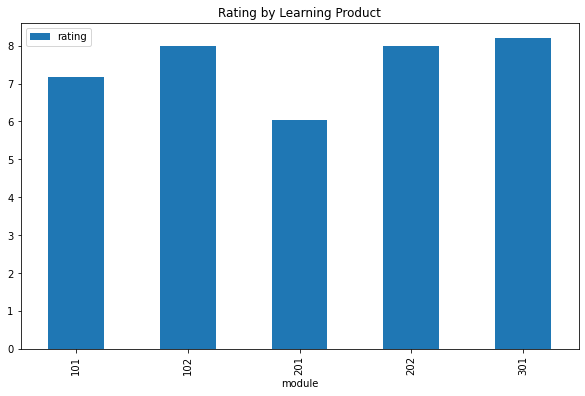

In [13]:
module_rating = df[["module", "rating"]]
module_rating.groupby("module").agg("mean").plot(kind="bar", title="Rating by Learning Product", figsize=(10,6))

### Rating by offering_id.
A deeper dive into specific offerings of a learning product.

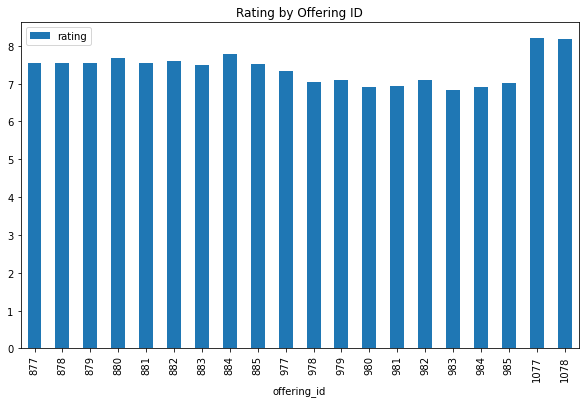

In [14]:
offering_rating = df[["offering_id", "rating"]]
offering_rating.groupby("offering_id").agg("mean").plot(kind="bar", title="Rating by Offering ID", figsize=(10,6))

### Crosstab of module and ratings.
A different view of overall ratings that shows the peaks and valleys, giving more insight into the success of a learning product or module.

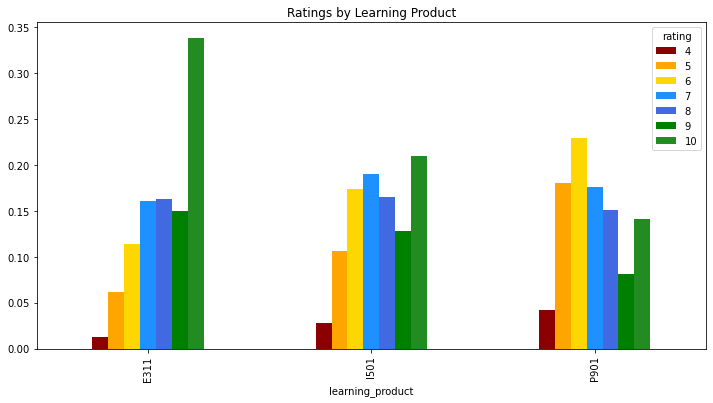

In [15]:
pd.crosstab(df.learning_product, df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Learning Product")

### Modules.
Digging a bit deeper into the products.

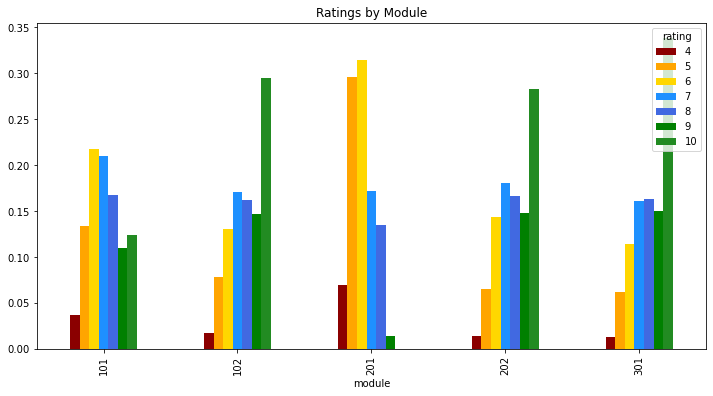

In [16]:
pd.crosstab(df.module, df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Module")

### Offerings.
Going deeper still, looking for differences in specific offerings of a learning product.

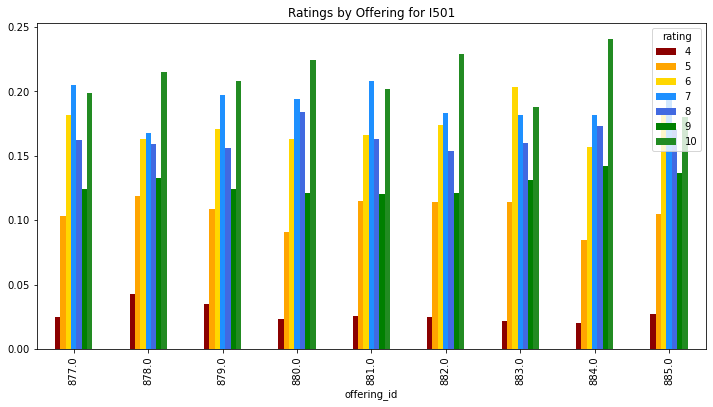

In [17]:
pd.crosstab(df.offering_id.where(df.learning_product=="I501"), df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Offering for I501")

### Examing ratings by audience.
How do different communities in the GC respond to our learning products?

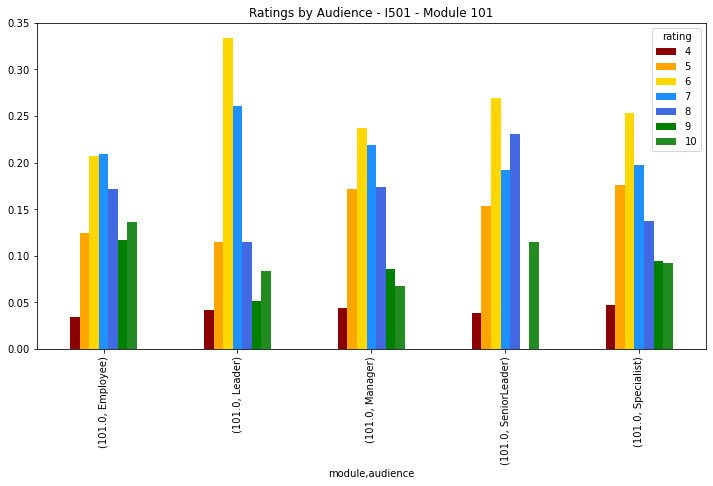

In [18]:
pd.crosstab([df.module.where(df.module==101), df.audience], df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Audience - I501 - Module 101")

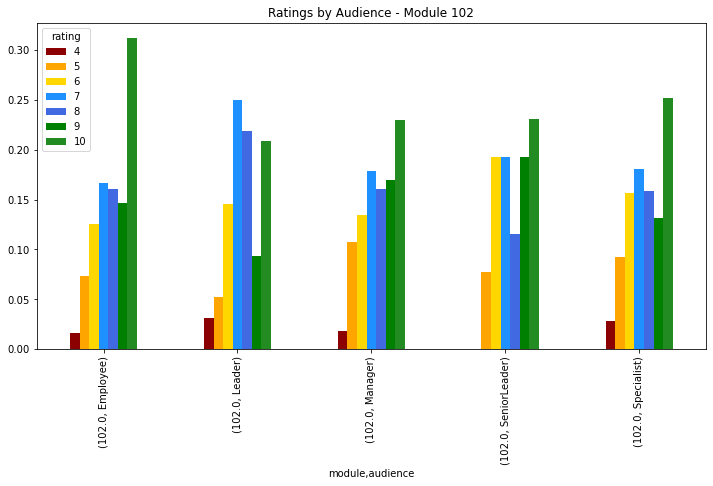

In [19]:
pd.crosstab([df.module.where(df.module==102), df.audience], df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Audience - Module 102")

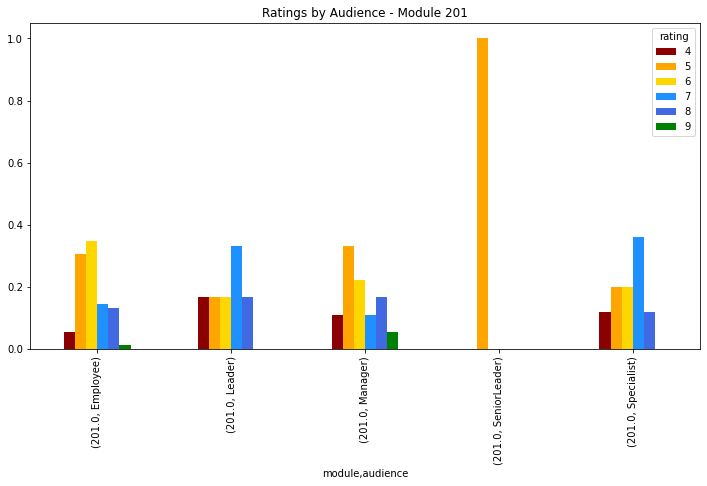

In [20]:
pd.crosstab([df.module.where(df.module==201), df.audience], df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Audience - Module 201")

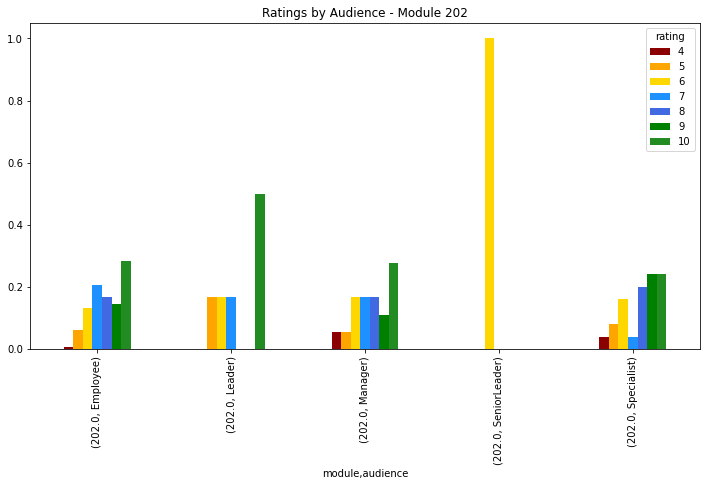

In [21]:
pd.crosstab([df.module.where(df.module==202), df.audience], df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Audience - Module 202")

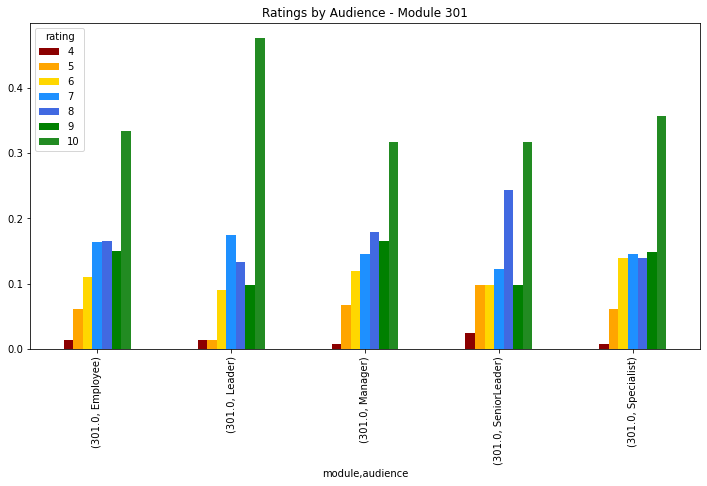

In [22]:
pd.crosstab([df.module.where(df.module==301), df.audience], df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Audience - Module 301")

## Learner Feedback
Acquiring fast, actionable insight into our learning products.

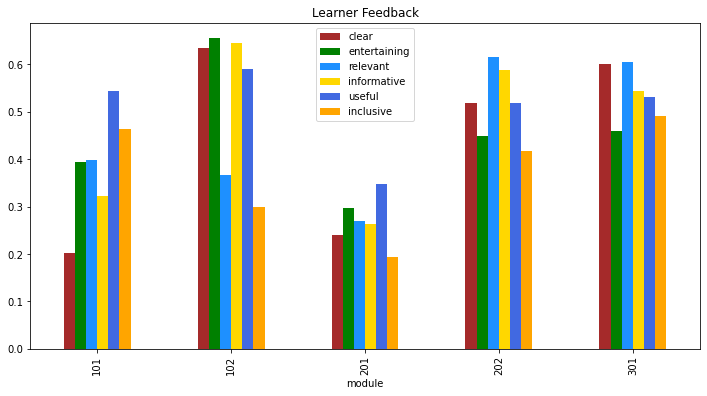

In [23]:
module.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6),
                                       color=seven_diff)

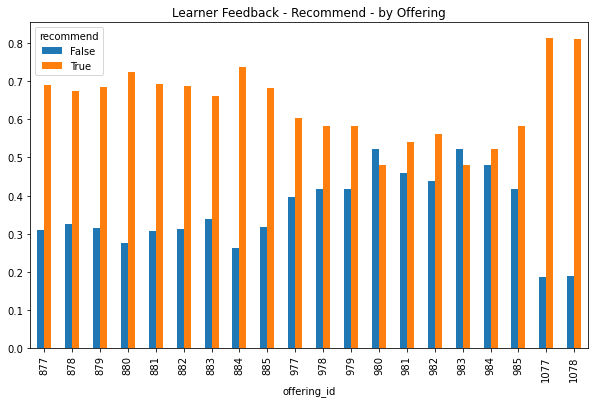

In [24]:
pd.crosstab(df.offering_id, df.recommend, normalize="index").plot(
    title="Learner Feedback - Recommend - by Offering", kind="bar", figsize=(10,6))

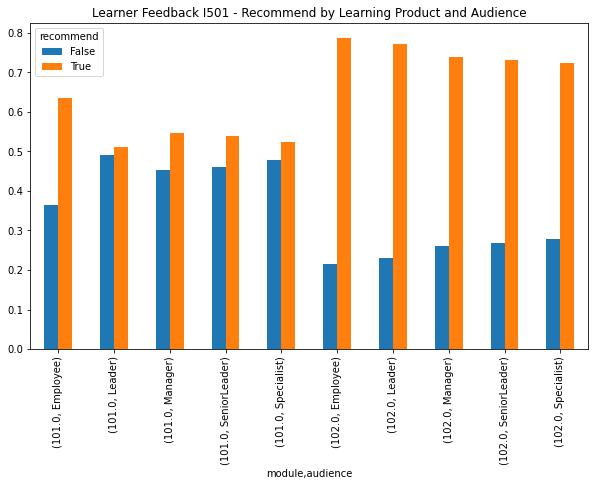

In [25]:
pd.crosstab([df.module.where(df.learning_product=="I501"), df.audience], df.recommend, normalize="index").plot(
    title="Learner Feedback I501 - Recommend by Learning Product and Audience", kind="bar", figsize=(10,6))

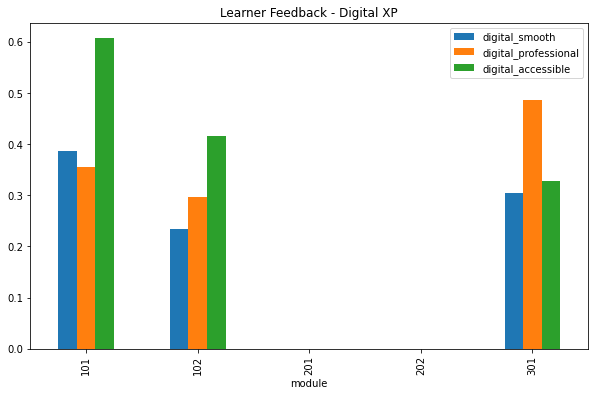

In [26]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

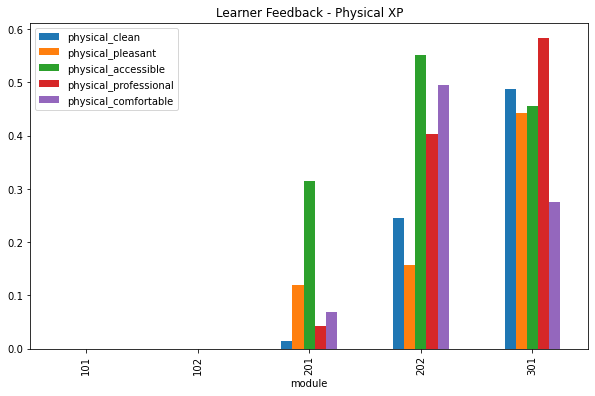

In [27]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

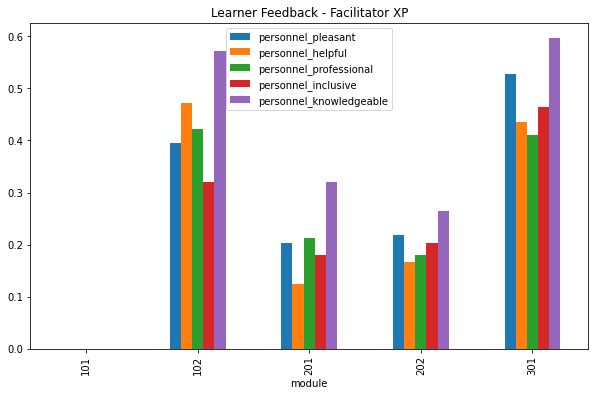

In [28]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

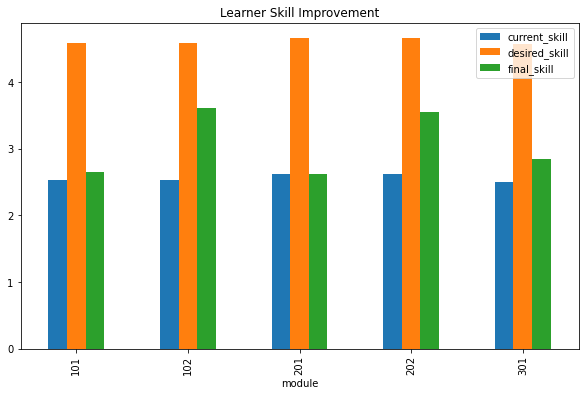

In [29]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [30]:
learning_obj.lo_1.unique()

array(['Meet', 'NotMeet', 'Exceeded'], dtype=object)

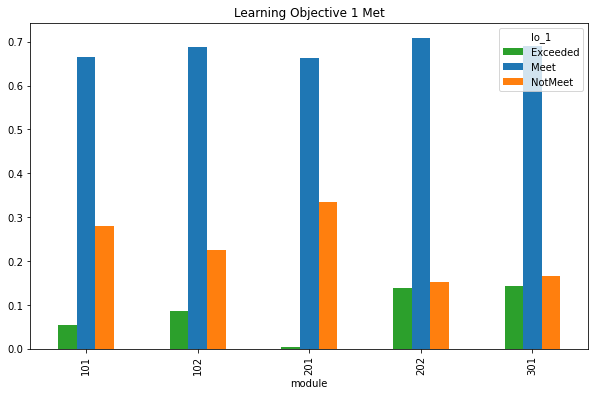

In [31]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

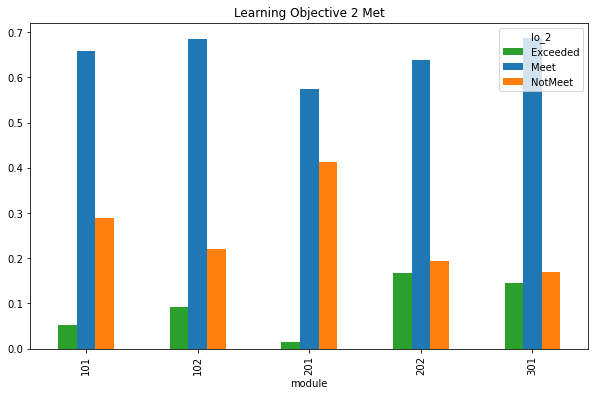

In [32]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [33]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

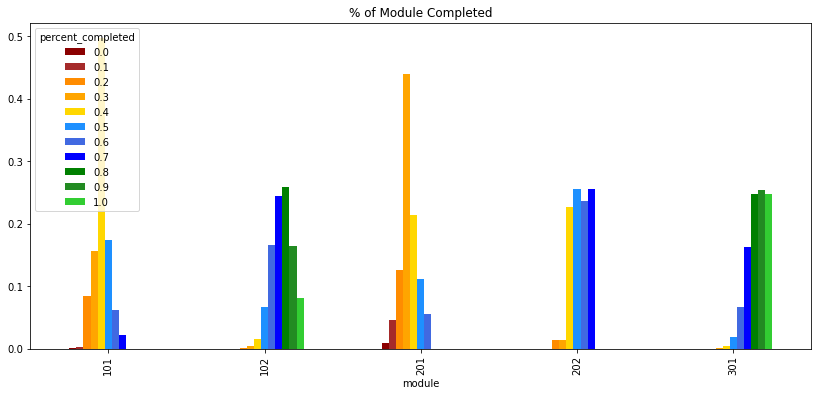

In [34]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

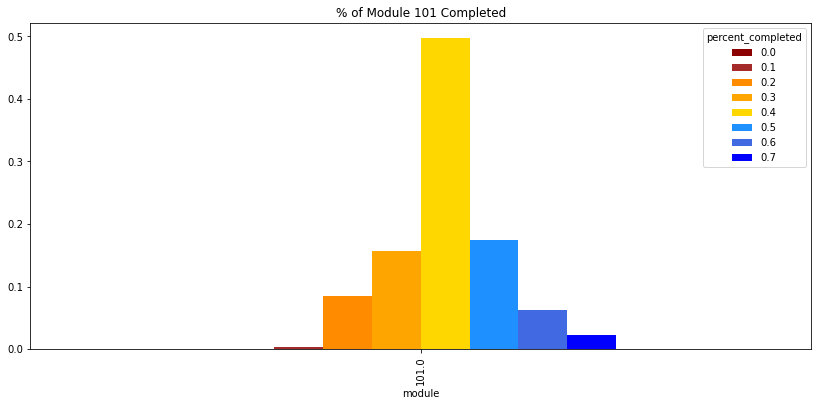

In [35]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [36]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,
877,I501,25,103,182,205,162,124,199
878,I501,43,119,163,168,159,133,215
879,I501,35,109,171,197,156,124,208
880,I501,23,91,163,194,184,121,224
881,I501,26,115,166,208,163,120,202
882,I501,25,114,174,183,154,121,229
883,I501,22,114,203,182,160,131,188
884,I501,20,85,157,182,173,142,241
885,I501,27,105,186,194,171,137,180


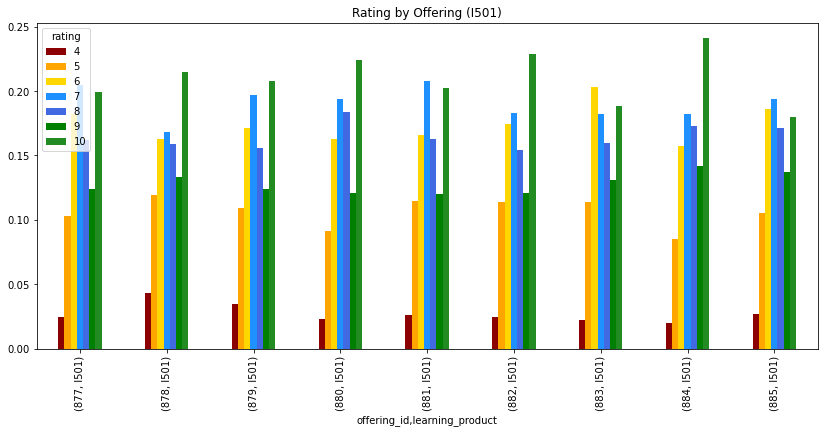

In [37]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=seven_grad)

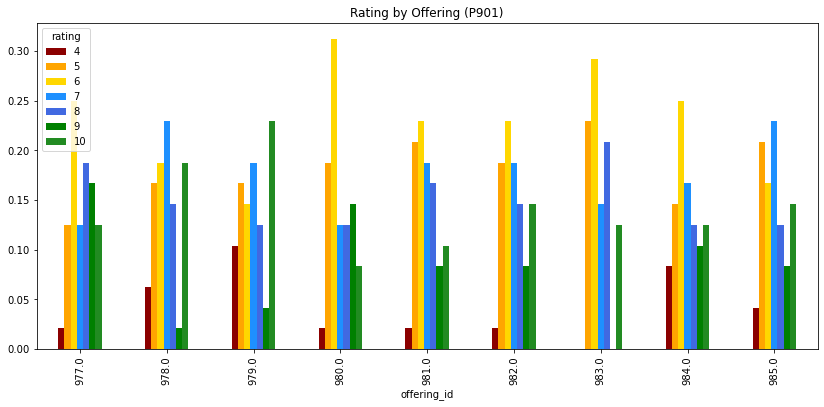

In [38]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=seven_grad)

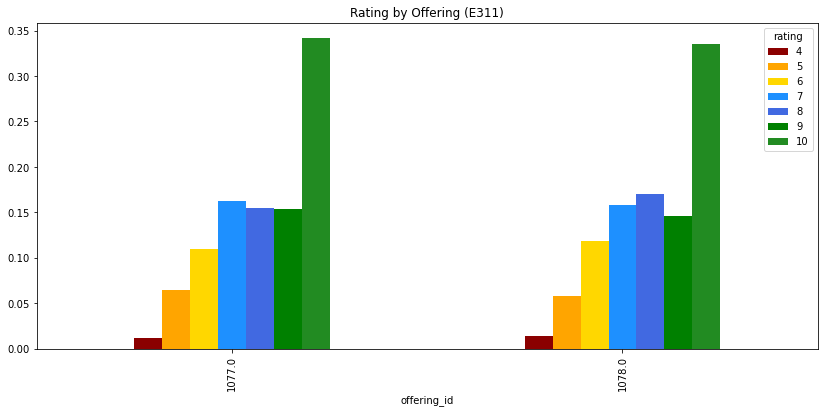

In [39]:
df.groupby(df["offering_id"].where(df.learning_product=="E311"))["rating"].value_counts(
    normalize=True).unstack().plot(kind='bar', title="Rating by Offering (E311)", figsize=(14,6), color=seven_grad)

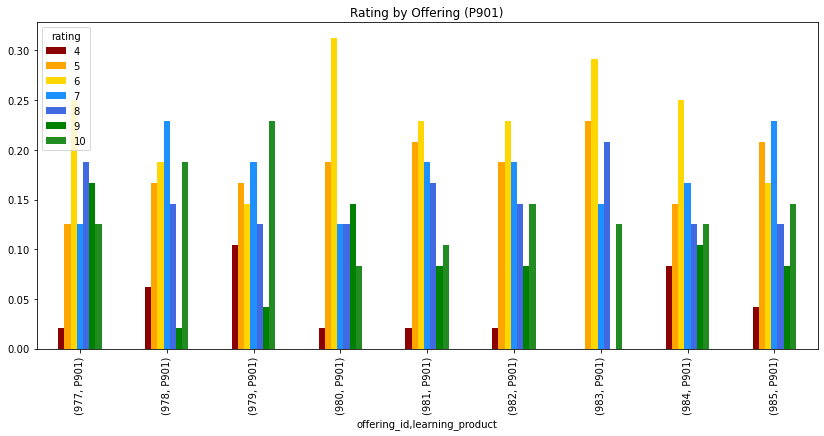

In [40]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=seven_grad)

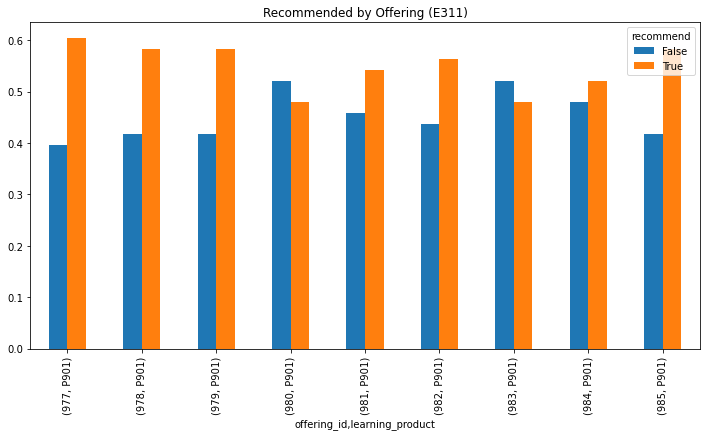

In [41]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

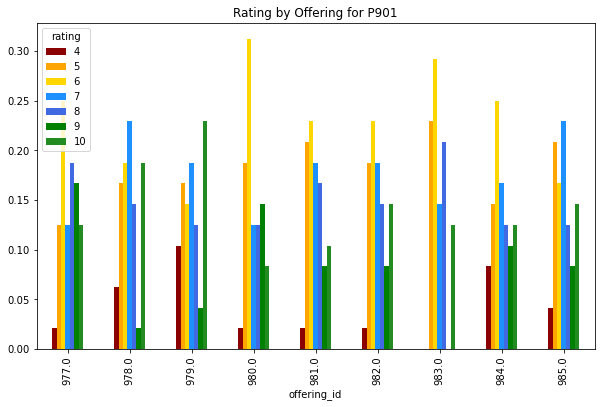

In [42]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=seven_grad)

In [43]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,8.202167
I501,7.581444
P901,7.020833


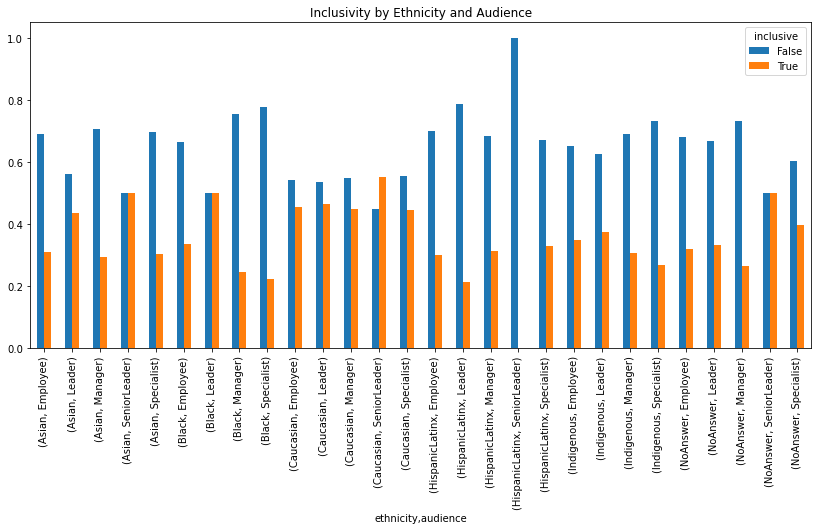

In [44]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

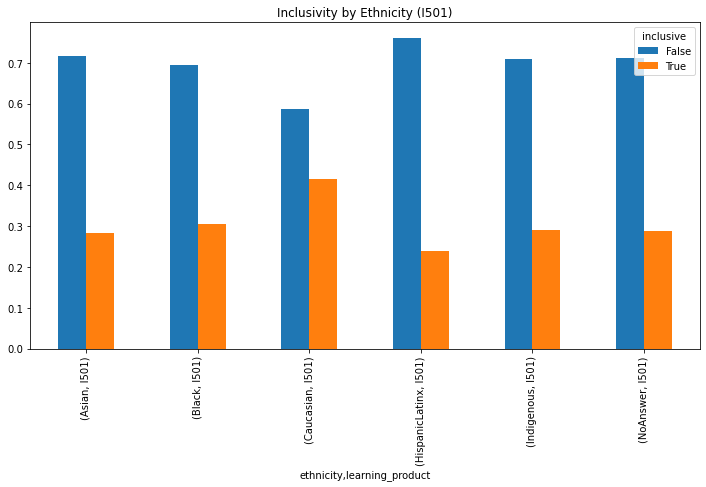

In [45]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

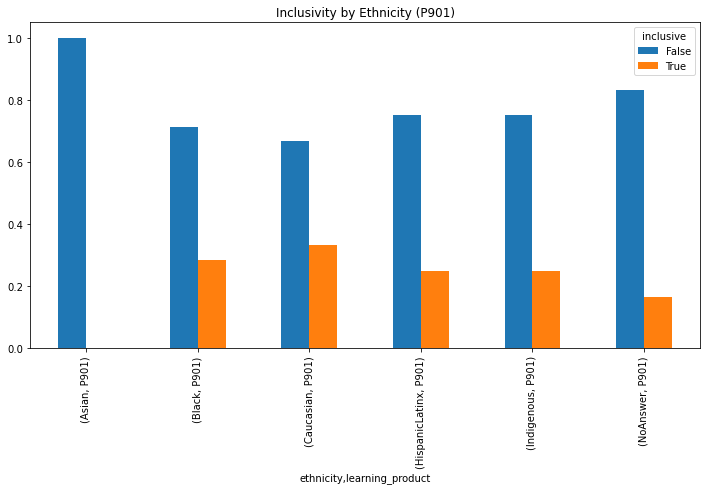

In [46]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

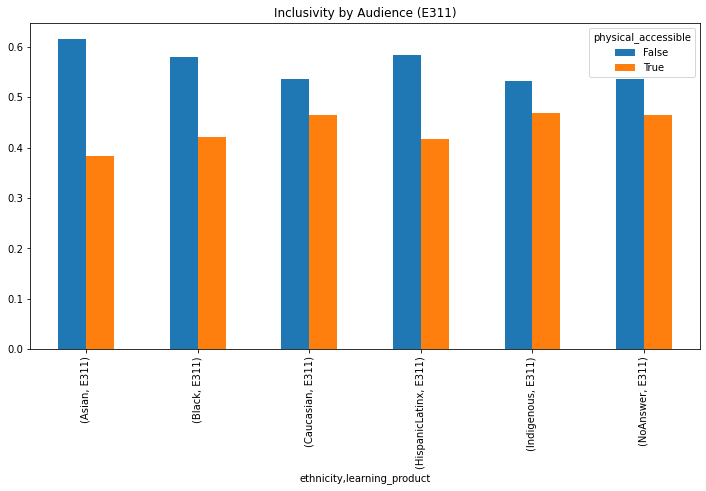

In [47]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.physical_accessible==True, normalize="index").plot(kind='bar', title="Inclusivity by Audience (E311)", figsize=(12,6))

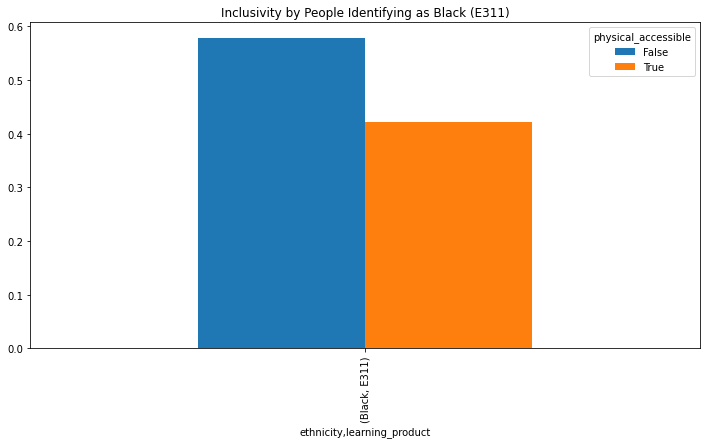

In [48]:
pd.crosstab([df.ethnicity.where(df.ethnicity=="Black"), df.learning_product.where(df.learning_product=="E311")], df.physical_accessible==True, normalize="index").plot(kind='bar', title="Inclusivity by People Identifying as Black (E311)", figsize=(12,6))

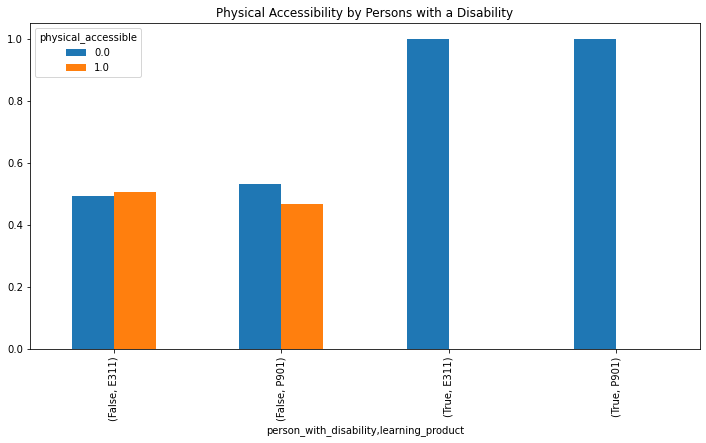

In [49]:
pd.crosstab([df.person_with_disability, df.learning_product], df.physical_accessible.where(df.physical_space==True), normalize="index").plot(
    kind='bar', title="Physical Accessibility by Persons with a Disability", figsize=(12,6))

In [50]:
df.query('person_with_disability == True & audience == "Employee" & ethnicity == "Black"').groupby(df.rating).agg("mean")

,eval_id,learner_id,level,person_with_disability,openness,exclusion,registration_id,offering_id,duration,module,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
rating,,,,,,,,,,,,,,,,,,,,,
4,75746.500000,5746.500000,4.500000,1.0,0.249706,0.700000,55246.500000,882.500000,67.500000,101.500000,...,1.000000,0.000000,0.000000,0.0,0.500000,0.250000,0.000000,0.000000,0.000000,0.250000
5,77247.166667,7247.166667,4.000000,1.0,0.379851,0.766667,68747.166667,929.333333,70.000000,151.333333,...,0.833333,0.166667,0.333333,0.0,0.666667,0.166667,0.333333,0.000000,0.000000,0.166667
6,78500.444444,8500.444444,2.777778,1.0,0.487603,0.811111,80500.444444,935.555556,80.000000,156.888889,...,0.888889,0.444444,0.111111,0.0,0.555556,0.111111,0.222222,0.333333,0.000000,0.000000
7,84704.428571,14704.428571,2.071429,1.0,0.549795,0.807143,138775.857143,1007.785714,64.285714,229.714286,...,1.000000,0.285714,0.500000,0.0,0.785714,0.285714,0.357143,0.142857,0.071429,0.142857
8,75221.571429,5221.571429,3.285714,1.0,0.652953,0.742857,50221.571429,882.000000,70.714286,101.428571,...,1.000000,0.428571,0.571429,0.0,0.428571,0.285714,0.000000,0.285714,0.000000,0.285714
9,80804.777778,10804.777778,3.333333,1.0,0.698575,0.722222,102804.777778,968.111111,66.666667,190.111111,...,1.000000,0.444444,0.777778,0.0,0.666667,0.444444,0.444444,0.333333,0.111111,0.555556
10,83486.500000,13486.500000,3.166667,1.0,0.765639,0.683333,125236.500000,995.583333,53.750000,218.083333,...,1.000000,0.500000,0.250000,0.0,1.000000,0.666667,0.666667,0.583333,0.333333,0.666667


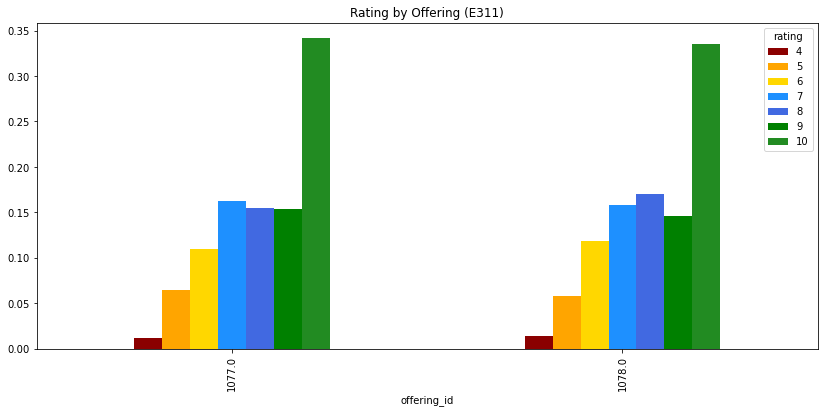

In [53]:
df.groupby(df["offering_id"].where(df.learning_product=="E311"))["rating"].value_counts(
    normalize=True).unstack().plot(kind='bar', title="Rating by Offering (E311)", figsize=(14,6), color=seven_grad)